## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0  52.194721  1291.176426  0.668224   9.136797   864.179502
1  49.097378   300.643071  0.553129  10.762742   173.396377
2  42.192270   565.937344  0.144211   7.615584    91.797369
3   2.954240  1357.768609  0.747564   1.760280  1014.987830
4  60.114421  1499.898675  0.253369   8.191329   384.697700


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0002840	total: 50.8ms	remaining: 50.7s
1:	learn: 0.9908734	total: 52ms	remaining: 25.9s
2:	learn: 0.9797838	total: 52.4ms	remaining: 17.4s
3:	learn: 0.9694088	total: 52.8ms	remaining: 13.1s
4:	learn: 0.9559132	total: 53.1ms	remaining: 10.6s
5:	learn: 0.9474945	total: 53.5ms	remaining: 8.87s
6:	learn: 0.9344767	total: 53.8ms	remaining: 7.63s
7:	learn: 0.9219352	total: 54.1ms	remaining: 6.71s
8:	learn: 0.9090428	total: 54.4ms	remaining: 5.99s
9:	learn: 0.8975200	total: 54.8ms	remaining: 5.42s
10:	learn: 0.8864971	total: 55.2ms	remaining: 4.96s
11:	learn: 0.8758571	total: 55.6ms	remaining: 4.58s
12:	learn: 0.8637346	total: 56ms	remaining: 4.25s
13:	learn: 0.8537380	total: 56.5ms	remaining: 3.98s
14:	learn: 0.8426425	total: 57.1ms	remaining: 3.75s
15:	learn: 0.8322557	total: 57.7ms	remaining: 3.54s
16:	learn: 0.8222340	total: 58.2ms	remaining: 3.36s
17:	learn: 0.8142889	total: 58.7ms	remaining: 3.2s
18:	learn: 0.8043730	total: 59.1ms	remaining: 3.0

113:	learn: 0.2840564	total: 107ms	remaining: 832ms
114:	learn: 0.2802811	total: 108ms	remaining: 828ms
115:	learn: 0.2772258	total: 108ms	remaining: 823ms
116:	learn: 0.2745637	total: 108ms	remaining: 818ms
117:	learn: 0.2722568	total: 109ms	remaining: 814ms
118:	learn: 0.2698850	total: 109ms	remaining: 810ms
119:	learn: 0.2675158	total: 110ms	remaining: 806ms
120:	learn: 0.2652274	total: 110ms	remaining: 801ms
121:	learn: 0.2621001	total: 111ms	remaining: 797ms
122:	learn: 0.2590917	total: 111ms	remaining: 793ms
123:	learn: 0.2562180	total: 112ms	remaining: 789ms
124:	learn: 0.2532609	total: 112ms	remaining: 786ms
125:	learn: 0.2506691	total: 113ms	remaining: 782ms
126:	learn: 0.2482483	total: 113ms	remaining: 778ms
127:	learn: 0.2460828	total: 114ms	remaining: 774ms
128:	learn: 0.2436804	total: 114ms	remaining: 770ms
129:	learn: 0.2411880	total: 114ms	remaining: 766ms
130:	learn: 0.2390673	total: 115ms	remaining: 761ms
131:	learn: 0.2373116	total: 115ms	remaining: 759ms
132:	learn: 

249:	learn: 0.0874740	total: 169ms	remaining: 507ms
250:	learn: 0.0869185	total: 170ms	remaining: 506ms
251:	learn: 0.0864637	total: 170ms	remaining: 505ms
252:	learn: 0.0857349	total: 171ms	remaining: 504ms
253:	learn: 0.0850278	total: 171ms	remaining: 502ms
254:	learn: 0.0846507	total: 171ms	remaining: 501ms
255:	learn: 0.0840878	total: 172ms	remaining: 499ms
256:	learn: 0.0835545	total: 172ms	remaining: 498ms
257:	learn: 0.0829175	total: 173ms	remaining: 497ms
258:	learn: 0.0822703	total: 173ms	remaining: 495ms
259:	learn: 0.0818550	total: 173ms	remaining: 494ms
260:	learn: 0.0814323	total: 174ms	remaining: 493ms
261:	learn: 0.0808974	total: 174ms	remaining: 491ms
262:	learn: 0.0802941	total: 175ms	remaining: 490ms
263:	learn: 0.0795506	total: 175ms	remaining: 489ms
264:	learn: 0.0788699	total: 176ms	remaining: 488ms
265:	learn: 0.0782091	total: 176ms	remaining: 487ms
266:	learn: 0.0774330	total: 177ms	remaining: 486ms
267:	learn: 0.0767131	total: 177ms	remaining: 484ms
268:	learn: 

476:	learn: 0.0235017	total: 273ms	remaining: 300ms
477:	learn: 0.0233892	total: 274ms	remaining: 299ms
478:	learn: 0.0233511	total: 274ms	remaining: 298ms
479:	learn: 0.0232210	total: 275ms	remaining: 298ms
480:	learn: 0.0231836	total: 275ms	remaining: 297ms
481:	learn: 0.0231467	total: 276ms	remaining: 296ms
482:	learn: 0.0230133	total: 276ms	remaining: 295ms
483:	learn: 0.0229681	total: 276ms	remaining: 295ms
484:	learn: 0.0228576	total: 277ms	remaining: 294ms
485:	learn: 0.0227809	total: 277ms	remaining: 293ms
486:	learn: 0.0226731	total: 277ms	remaining: 292ms
487:	learn: 0.0226295	total: 278ms	remaining: 292ms
488:	learn: 0.0225241	total: 278ms	remaining: 291ms
489:	learn: 0.0224094	total: 279ms	remaining: 290ms
490:	learn: 0.0223362	total: 279ms	remaining: 289ms
491:	learn: 0.0222339	total: 280ms	remaining: 289ms
492:	learn: 0.0221987	total: 280ms	remaining: 288ms
493:	learn: 0.0221276	total: 280ms	remaining: 287ms
494:	learn: 0.0220259	total: 281ms	remaining: 286ms
495:	learn: 

650:	learn: 0.0130325	total: 351ms	remaining: 188ms
651:	learn: 0.0129783	total: 351ms	remaining: 188ms
652:	learn: 0.0129429	total: 352ms	remaining: 187ms
653:	learn: 0.0129312	total: 352ms	remaining: 186ms
654:	learn: 0.0128999	total: 353ms	remaining: 186ms
655:	learn: 0.0128882	total: 353ms	remaining: 185ms
656:	learn: 0.0128358	total: 354ms	remaining: 185ms
657:	learn: 0.0128012	total: 354ms	remaining: 184ms
658:	learn: 0.0127898	total: 355ms	remaining: 183ms
659:	learn: 0.0127592	total: 355ms	remaining: 183ms
660:	learn: 0.0127479	total: 355ms	remaining: 182ms
661:	learn: 0.0126973	total: 356ms	remaining: 182ms
662:	learn: 0.0126670	total: 356ms	remaining: 181ms
663:	learn: 0.0126560	total: 357ms	remaining: 181ms
664:	learn: 0.0126224	total: 357ms	remaining: 180ms
665:	learn: 0.0126115	total: 358ms	remaining: 179ms
666:	learn: 0.0125818	total: 358ms	remaining: 179ms
667:	learn: 0.0125711	total: 359ms	remaining: 178ms
668:	learn: 0.0125222	total: 359ms	remaining: 178ms
669:	learn: 

877:	learn: 0.0078023	total: 455ms	remaining: 63.2ms
878:	learn: 0.0077955	total: 456ms	remaining: 62.7ms
879:	learn: 0.0077913	total: 456ms	remaining: 62.2ms
880:	learn: 0.0077766	total: 456ms	remaining: 61.7ms
881:	learn: 0.0077398	total: 457ms	remaining: 61.1ms
882:	learn: 0.0077265	total: 457ms	remaining: 60.6ms
883:	learn: 0.0077161	total: 458ms	remaining: 60.1ms
884:	learn: 0.0077059	total: 458ms	remaining: 59.5ms
885:	learn: 0.0076924	total: 459ms	remaining: 59ms
886:	learn: 0.0076823	total: 459ms	remaining: 58.5ms
887:	learn: 0.0076745	total: 459ms	remaining: 57.9ms
888:	learn: 0.0076614	total: 460ms	remaining: 57.4ms
889:	learn: 0.0076570	total: 460ms	remaining: 56.9ms
890:	learn: 0.0076421	total: 460ms	remaining: 56.3ms
891:	learn: 0.0076322	total: 461ms	remaining: 55.8ms
892:	learn: 0.0076279	total: 461ms	remaining: 55.3ms
893:	learn: 0.0076131	total: 462ms	remaining: 54.7ms
894:	learn: 0.0076088	total: 462ms	remaining: 54.2ms
895:	learn: 0.0075759	total: 463ms	remaining: 53

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


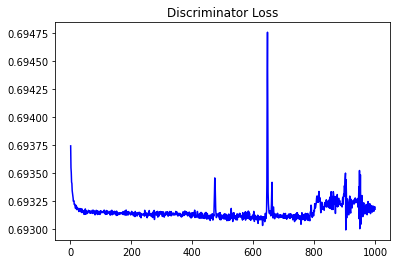

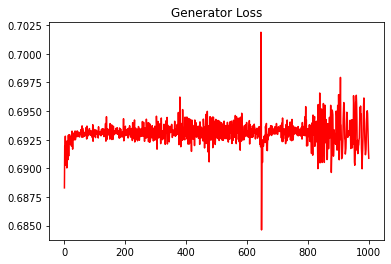

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0351251672564185


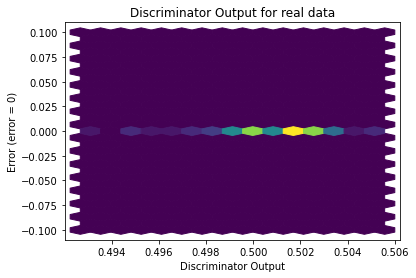

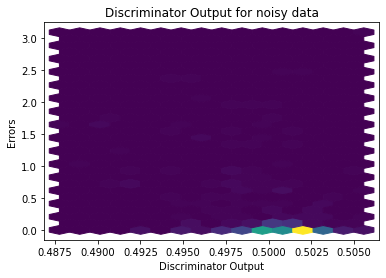

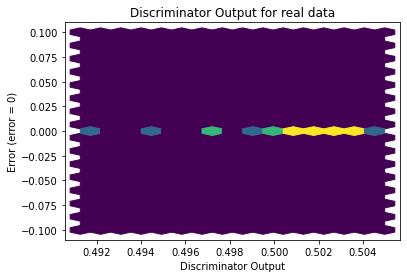

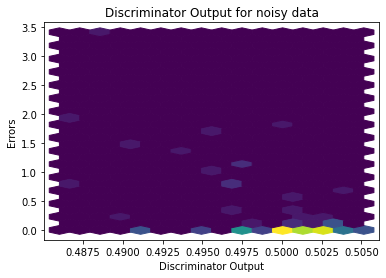

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0354]], requires_grad=True)
